In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

## Install this on a new system
# nltk.download('punkt')
from nltk.tokenize import word_tokenize


warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')




## Get the overall info from the dataset


In [2]:
## Read the dataset from CSV file

city_df = pd.read_csv("textdata/SanAntonio-dataset.csv")



In [3]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 621 non-null    object 
 1   created_at                  621 non-null    object 
 2   hashtags                    358 non-null    object 
 3   media                       3 non-null      object 
 4   urls                        611 non-null    object 
 5   favorite_count              621 non-null    int64  
 6   id                          621 non-null    int64  
 7   in_reply_to_screen_name     0 non-null      float64
 8   in_reply_to_status_id       0 non-null      float64
 9   in_reply_to_user_id         0 non-null      float64
 10  lang                        621 non-null    object 
 11  place                       621 non-null    object 
 12  possibly_sensitive          613 non-null    object 
 13  retweet_count               621 non

In [4]:
city_df.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,"-98.58251,29.4881",Thu Apr 23 22:26:31 +0000 2020,covid19 milspouse helpingveterans vahomeloan v...,NaN,https://www.instagram.com/p/B_VxBVun2xf/?igshi...,1,1253450205623713793,NaN,NaN,NaN,...,550,744,10,"Schertz, TX",Judy Goldick Realtor,JgoldickRealtor,2123,NaN,http://regalrealtysa.com,False
1,"-98.39373298,29.5618105",Fri Mar 20 19:01:13 +0000 2020,NaN,NaN,https://www.instagram.com/p/B992f6KAtOM/?igshi...,0,1241077350424608773,NaN,NaN,NaN,...,870,219,18,TEXAS,Capicu,CAPITHEGREAT,12036,NaN,NaN,False
2,"-98.5,29.4167",Tue Apr 21 16:24:08 +0000 2020,NaN,NaN,https://www.instagram.com/p/B_P9sfznfHB/?igshi...,9,1252634234159861768,NaN,NaN,NaN,...,1062,556,8,"San Antonio, TX",Garrett T Capps,Garrett_T_Capps,2780,NaN,https://linktr.ee/garretttcapps,False
3,"-98.5,29.4167",Fri May 01 05:58:42 +0000 2020,homeschool quarantine school kindergarten exte...,NaN,https://www.instagram.com/p/B_omVPIHkLF/?igshi...,0,1256100716105662464,NaN,NaN,NaN,...,289,278,32,"San Antonio, TX",Ethan Allsup,SASPURSBABY,18540,NaN,NaN,False
4,"-98.5,29.4167",Sat Apr 04 00:52:53 +0000 2020,sanantonio,NaN,https://www.instagram.com/p/B-ih3vLDugT/?igshi...,0,1246239281636470785,NaN,NaN,NaN,...,46,90,0,"San Antonio, TX",Arnaldo Ritchie,chaoritchie,65,NaN,NaN,False


In [5]:
# ASSIGN Set dataset info 

# toronto_df.info()
# toronto_df.head(5)


## Create a dataframe with a column for tweets
#df_text = toronto_df['text']
# df_text = toronto_df[['text']].convert_dtypes(object,str)

df_text = city_df[['text']].convert_dtypes(object,str)
df_text['created_at'] = city_df[['created_at']].convert_dtypes(object,str)
df_text['place'] = city_df[['place']].convert_dtypes(object,str)
df_text['hashtags'] = city_df[['hashtags']].convert_dtypes(object,str)

# df_timebased_tweets = 
## Perhaps we need the hashtags too
# created_at	, hashtags,  place

#df_text = toronto_df[['hashtags','text']]

#df_text.info()
# df_text.head(10)            

In [6]:
df_text.head(10)    

,text,created_at,place,hashtags
0,Impromptu marketing session with Chris Cano. 🎥...,Thu Apr 23 22:26:31 +0000 2020,"San Antonio, TX",covid19 milspouse helpingveterans vahomeloan v...
1,Corona virus!!! Shit is real shit is getting r...,Fri Mar 20 19:01:13 +0000 2020,"San Antonio, TX",<NA>
2,I’ll be hosting a telethon that streams live f...,Tue Apr 21 16:24:08 +0000 2020,"San Antonio, TX",<NA>
3,📚Day 29 of RONA Elementary - Level 2 Reading📚 ...,Fri May 01 05:58:42 +0000 2020,"San Antonio, TX",homeschool quarantine school kindergarten exte...
4,"""Corona Virus, Shit is real"" #sanantonio @ San...",Sat Apr 04 00:52:53 +0000 2020,"San Antonio, TX",sanantonio
5,Our 🌎 is changing. The old 🌎 is falling so the...,Sat May 02 18:17:59 +0000 2020,"Texas, USA",<NA>
6,📚Day 27 of RONA Elementary - Zoom meetings got...,Thu Apr 30 01:31:51 +0000 2020,"San Antonio, TX",homeschool quarantine school kindergarten exte...
7,Brighter days on the mind. Today’s the first d...,Thu Apr 02 00:53:37 +0000 2020,"San Antonio, TX",<NA>
8,I caught the coronavirus again. Well at least ...,Sat May 09 04:38:56 +0000 2020,"San Antonio, TX",<NA>
9,incase anyone is wondering what I'm actually t...,Thu Apr 30 08:54:13 +0000 2020,"San Antonio, TX",<NA>


## Cleaning the text Data

In [7]:
#1-Clean Emojis from text
def cleanEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#2-CleanTweets function replaces non-text entities with space
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]','',text, flags=re.MULTILINE)  # Remove @mentions
    text = re.sub(r'#','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'@','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'RT[\s]+','',text, flags=re.MULTILINE)        # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text, flags=re.MULTILINE) # Remove the hyper link
    text = re.sub(r'http?:\/\/\S+','',text, flags=re.MULTILINE)  # Remove the hyper link

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Note: remove special charactres and punctuations -
    text = re.sub(r'[^a-zA-Z# ]','',text, flags=re.MULTILINE)
    
    
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotography', '', text, flags=re.MULTILINE)
    text = re.sub('igstreet', '', text, flags=re.MULTILINE)   
    text = re.sub('cityscape', '', text, flags=re.MULTILINE)
    text = re.sub('streetphotographer', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotogallery', '', text, flags=re.MULTILINE)
    text = re.sub('photodocumentary', '', text, flags=re.MULTILINE)
    text = re.sub('ig_street', '', text, flags=re.MULTILINE)
    text = re.sub('Covid', '', text, flags=re.MULTILINE)
    text = re.sub('COVID', '', text, flags=re.MULTILINE)
    text = re.sub('covid', '', text, flags=re.MULTILINE)
    text = re.sub('spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('Spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('lensculture', '', text, flags=re.MULTILINE)
    text = re.sub('Toronto', '', text, flags=re.MULTILINE)
    text = re.sub('Ontario', '', text, flags=re.MULTILINE)
    text = re.sub('will', '', text, flags=re.MULTILINE)
    text = re.sub('bnw', '', text, flags=re.MULTILINE)
    text = re.sub('bw', '', text, flags=re.MULTILINE)


    text = re.sub(r'\xc2\xb7','',text)  # Remove bullet points
    text = re.sub(r'\u2022','',text)  # Remove bullet points       
    # text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)          # Remove links that start with HTTP/HTTPS in the tweet
    # text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)           # Remove other url links


    return text


In [8]:
# pass the text through cleantweet and removeEmoji functions
# s = df_text.iloc[[2]]
df_text['text'] = df_text['text'].apply(cleanTweets)
df_text['text'] = df_text['text'].apply(cleanEmoji)




In [9]:
df_text.head(2)

,text,created_at,place,hashtags
0,Impromptu marketing session with Chris Cano Ta...,Thu Apr 23 22:26:31 +0000 2020,"San Antonio, TX",covid19 milspouse helpingveterans vahomeloan v...
1,Corona virus Shit is real shit is getting real...,Fri Mar 20 19:01:13 +0000 2020,"San Antonio, TX",<NA>


# A- Sentence Level Analysis

## Start working on the contect and subject area

In [10]:
#create a function to get the subjectivity
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns to add the sentiment and polarity
df_text['subjectivity'] = df_text['text'].apply(getSubjectivity)
df_text['polarity'] = df_text['text'].apply(getPolarity)

#Display the new dataset
df_text.head(10)


,text,created_at,place,hashtags,subjectivity,polarity
0,Impromptu marketing session with Chris Cano Ta...,Thu Apr 23 22:26:31 +0000 2020,"San Antonio, TX",covid19 milspouse helpingveterans vahomeloan v...,0.200000,0.050000
1,Corona virus Shit is real shit is getting real...,Fri Mar 20 19:01:13 +0000 2020,"San Antonio, TX",<NA>,0.597222,-0.113889
2,Ill be hosting a telethon that streams live fr...,Tue Apr 21 16:24:08 +0000 2020,"San Antonio, TX",<NA>,0.825000,0.041288
3,Day of RONA Elementary Level Readinghomesch...,Fri May 01 05:58:42 +0000 2020,"San Antonio, TX",homeschool quarantine school kindergarten exte...,0.900000,0.300000
4,Corona Virus Shit is real sanantonio San Anto...,Sat Apr 04 00:52:53 +0000 2020,"San Antonio, TX",sanantonio,0.550000,0.000000
5,Our is changing The old is falling so the ne...,Sat May 02 18:17:59 +0000 2020,"Texas, USA",<NA>,0.288636,0.059091
6,Day of RONA Elementary Zoom meetings got me ...,Thu Apr 30 01:31:51 +0000 2020,"San Antonio, TX",homeschool quarantine school kindergarten exte...,0.900000,0.300000
7,Brighter days on the mind Todays the first day...,Thu Apr 02 00:53:37 +0000 2020,"San Antonio, TX",<NA>,0.333333,0.250000
8,I caught the coronavirus again Well at least t...,Sat May 09 04:38:56 +0000 2020,"San Antonio, TX",<NA>,0.550000,0.250000
9,incase anyone is wondering what Im actually ta...,Thu Apr 30 08:54:13 +0000 2020,"San Antonio, TX",<NA>,0.100000,0.000000


In [11]:
# df_text.head(10)
df_text.to_csv("textdata/myexportfile_sanantonio.csv")

## Make a WordCloud chart -word frequency map

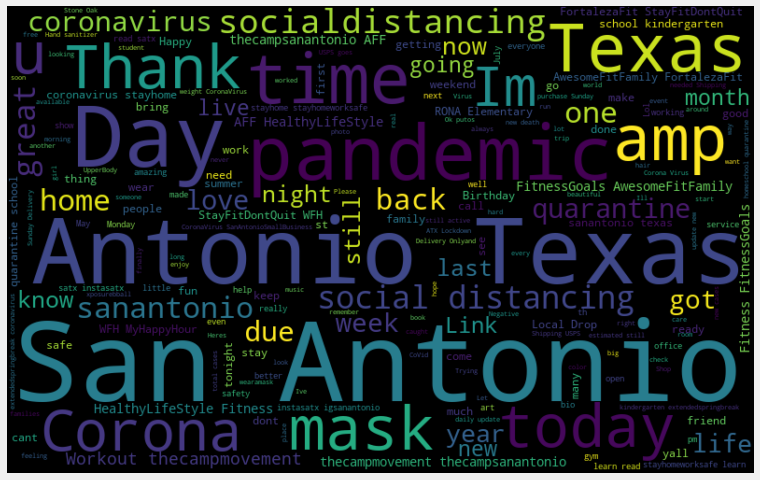

In [12]:
# plot outcome using word cloud
# visualize the most frequency used words
allWords = ' '.join(twts for twts in df_text['text'])

wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)

plt.figure(figsize=(19,8))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()


## Positive and Negative Sentiments

In [13]:
#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['analysis'] = df_text['polarity'].apply(getSentAnalysis)

#df_text


## All Negative Tweets

In [14]:
#print all of the negative tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Negative'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         # print()  #to print uncomment
#         j = j+1

## All Positive Tweets

In [15]:
#print all of the Positive tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Positive'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         print()
#         j = j+1

## Scatter pLot - map the postitive-negative distribution

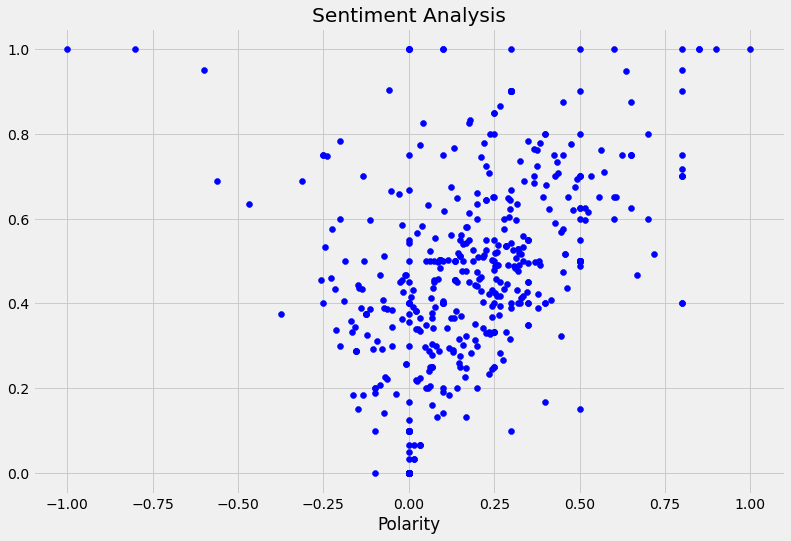

In [16]:
# plot the polarity and subjectivity
plt.figure(figsize=(12,8))
for i in range(0,df_text.shape[0]):
    plt.scatter(df_text['polarity'][i],df_text['subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

## Overall picture: Positive, Negative, Neutral


In [17]:
#Get the percentages: Positive, Negative, Neutral

## Percentage of Positive Tweets
ptweets = df_text[df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")


--> percentage of positive tweets: 58.3 %


In [18]:
# Get the percentage of negative tweets
ntweets = df_text[df_text.analysis == 'Negative']
ntweets = ntweets['text']

## Percentage of Negative Tweets

negativetweets = round( (ntweets.shape[0] / df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")


--> percentage of negative tweets: 12.6 %


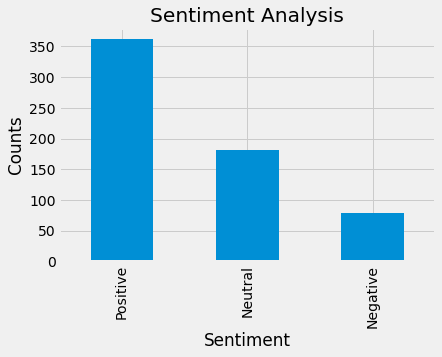

In [19]:
#Show the value counts
df_text['analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_text['analysis'].value_counts().plot(kind='bar')

plt.show('Sentiment')



# B- Word Level Analysis

## B.1 Define Tokenized Tweets

In [20]:
# import the stopword library

from nltk.corpus import stopwords
# nltk.download('stopwords')  #need to run on a new machine

import ast  #used for literal_eval



In [21]:
import nltk
##  Add a new column "tokenized_tw" to the dataset and include the tokenized tweets
##  split content into words

df_text['tokenized_tw'] = df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# df_text['tokenized_tw'] = df_text['tokenized_tw'].tolist()

In [22]:
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,Impromptu marketing session with Chris Cano Ta...,Thu Apr 23 22:26:31 +0000 2020,"San Antonio, TX",covid19 milspouse helpingveterans vahomeloan v...,0.2,0.05,Positive,"[Impromptu, marketing, session, with, Chris, C..."


In [23]:
# convert all fields to lower case
df_text = df_text.apply(lambda x: x.astype(str).str.lower())
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,impromptu marketing session with chris cano ta...,thu apr 23 22:26:31 +0000 2020,"san antonio, tx",covid19 milspouse helpingveterans vahomeloan v...,0.2,0.05,positive,"['impromptu', 'marketing', 'session', 'with', ..."


## B.2 Apply Filters - Find/Remove Stopwords

In [24]:
# TODO double check the list of stop words, might need to use a different function later
# stop_words = stopwords.words('english')
# check what is included here 
# stop_words

In [25]:
df_text.head(2)
type(df_text['tokenized_tw'])

pandas.core.series.Series

In [26]:
## Apply filter for Stop Words { in , is, the , a, ... }
def remove_stopwords(TokenList):
  
    # Identify StopWords - get them from stopwords
    stop_words = stopwords.words('english')
    
    # convert string value to a list
    if isinstance(TokenList, str):
        TokenList = ast.literal_eval(TokenList)
 
        # TokenList = TokenList.split(",")
        for i, key in enumerate(TokenList):      
            if (key in stop_words):
                TokenList [i] = ''  
    
    return TokenList

          
nRecords = df_text['tokenized_tw'].count()
# nRecords = 3

# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(df_text['tokenized_tw'][x],str)):
        # tokenListHere = df_text['tokenized_tw'][0].split(",")
        df_text['tokenized_tw'][x] = remove_stopwords(df_text['tokenized_tw'][x])





In [27]:
# Remove 1 letter tokens
# df_text['tokenized_tw'] = df_text['tokenized_tw'].apply(lambda x: [item for item in str(x).split() if len(x) > 2])

df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,impromptu marketing session with chris cano ta...,thu apr 23 22:26:31 +0000 2020,"san antonio, tx",covid19 milspouse helpingveterans vahomeloan v...,0.2,0.05,positive,"[impromptu, marketing, session, , chris, cano,..."
1,corona virus shit is real shit is getting real...,fri mar 20 19:01:13 +0000 2020,"san antonio, tx",<na>,0.5972222222222222,-0.1138888888888889,negative,"[corona, virus, shit, , real, shit, , getting,..."


## B.2 Apply Filters - stemming words

In [28]:
#Stemming reduces words to their root or base.
from nltk.stem.porter import PorterStemmer

In [29]:
# stemming of words
def applyporter(TokenList):
    # create an object for stemming   
    porterstemmer = PorterStemmer()
    
    # TokenList = ast.literal_eval(TokenList)
    if isinstance(TokenList, str):
         TokenList = TokenList.split(",")

    for i, key in enumerate(TokenList):            
            TokenList [i] = porterstemmer.stem(key)                       
        
    return TokenList
# tokens = word_tokenize(text)



nRecords = df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x in range(nRecords-1):
    df_text['tokenized_tw'][x] = applyporter(df_text['tokenized_tw'][x])


In [30]:
df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,impromptu marketing session with chris cano ta...,thu apr 23 22:26:31 +0000 2020,"san antonio, tx",covid19 milspouse helpingveterans vahomeloan v...,0.2,0.05,positive,"[impromptu, market, session, , chri, cano, tal..."
1,corona virus shit is real shit is getting real...,fri mar 20 19:01:13 +0000 2020,"san antonio, tx",<na>,0.5972222222222222,-0.1138888888888889,negative,"[corona, viru, shit, , real, shit, , get, real..."


## Return the cleaned data into a sentence format

In [31]:
## combine word into a single sentence
for  i in range(nRecords):
    if isinstance(df_text['tokenized_tw'][i],list):
        df_text['tokenized_tw'][i] = " ".join(df_text['tokenized_tw'][i])


df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,impromptu marketing session with chris cano ta...,thu apr 23 22:26:31 +0000 2020,"san antonio, tx",covid19 milspouse helpingveterans vahomeloan v...,0.2,0.05,positive,impromptu market session chri cano talk real ...
1,corona virus shit is real shit is getting real...,fri mar 20 19:01:13 +0000 2020,"san antonio, tx",<na>,0.5972222222222222,-0.1138888888888889,negative,corona viru shit real shit get real everyth ...
2,ill be hosting a telethon that streams live fr...,tue apr 21 16:24:08 +0000 2020,"san antonio, tx",<na>,0.8250000000000001,0.0412878787878788,positive,ill host telethon stream live thelonesomer...
3,day of rona elementary level readinghomesch...,fri may 01 05:58:42 +0000 2020,"san antonio, tx",homeschool quarantine school kindergarten exte...,0.9,0.3,positive,day rona elementari level readinghomeschool q...
4,corona virus shit is real sanantonio san anto...,sat apr 04 00:52:53 +0000 2020,"san antonio, tx",sanantonio,0.55,0.0,neutral,corona viru shit real sanantonio san antonio ...
5,our is changing the old is falling so the ne...,sat may 02 18:17:59 +0000 2020,"texas, usa",<na>,0.2886363636363637,0.05909090909090909,positive,chang old fall new world begin colle...
6,day of rona elementary zoom meetings got me ...,thu apr 30 01:31:51 +0000 2020,"san antonio, tx",homeschool quarantine school kindergarten exte...,0.9,0.3,positive,day rona elementari zoom meet got likehomesc...
7,brighter days on the mind todays the first day...,thu apr 02 00:53:37 +0000 2020,"san antonio, tx",<na>,0.3333333333333333,0.25,positive,brighter day mind today first day seve ask ...
8,i caught the coronavirus again well at least t...,sat may 09 04:38:56 +0000 2020,"san antonio, tx",<na>,0.55,0.25,positive,caught coronaviru well least do xx cure...
9,incase anyone is wondering what im actually ta...,thu apr 30 08:54:13 +0000 2020,"san antonio, tx",<na>,0.1,0.0,neutral,incas anyon wonder im actual talk actual ...


## Create a WordCloud from cleaned tweets


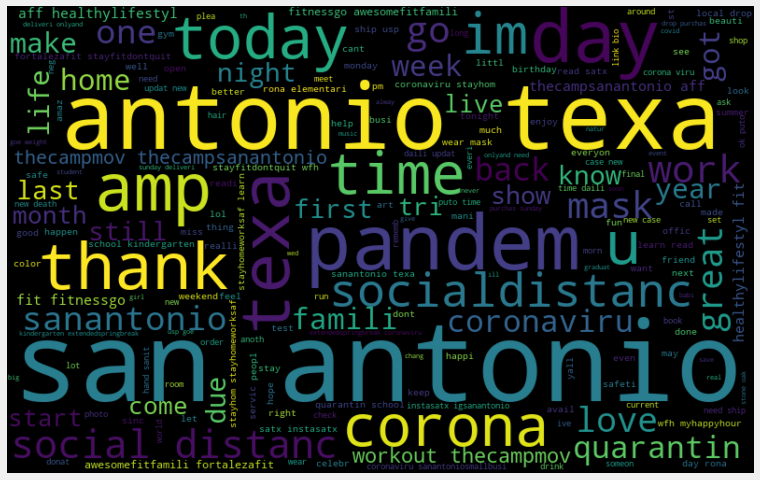

In [32]:
# visualize the most frequency used words using wordcloud

allWords = ' '.join(twts for twts in df_text['tokenized_tw'])

wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)

# size the plt object
plt.figure(figsize=(19,8))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Consider Location and Time in analysis

In [33]:

df_text.groupby(['place']).count


<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000140B06AE7C0>>

In [34]:
from datetime import datetime
from dateutil.parser import parse


In [35]:
#create a new column for data only
df_text['date'] = df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    df_text['date'][x] = datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
    # return date as a string
    # df_text['date'][x] = datetime.strftime(datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
  
# Extract month from the data variable, Add a new column
df_text['month']  = pd.DatetimeIndex(df_text['date']).month


In [36]:
df_text. head(3)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,impromptu marketing session with chris cano ta...,thu apr 23 22:26:31 +0000 2020,"san antonio, tx",covid19 milspouse helpingveterans vahomeloan v...,0.2,0.05,positive,impromptu market session chri cano talk real ...,2020-04-23 22:26:31,4
1,corona virus shit is real shit is getting real...,fri mar 20 19:01:13 +0000 2020,"san antonio, tx",<na>,0.5972222222222222,-0.1138888888888889,negative,corona viru shit real shit get real everyth ...,2020-03-20 19:01:13,3
2,ill be hosting a telethon that streams live fr...,tue apr 21 16:24:08 +0000 2020,"san antonio, tx",<na>,0.8250000000000001,0.0412878787878788,positive,ill host telethon stream live thelonesomer...,2020-04-21 16:24:08,4


## Data preparation for further visualizations

In [37]:

# Group by place
# placesRecords = df_text.groupby(['place'])

# get the first item in each place group
# placesRecords.first()


# remove ontario from place column
lista = df_text.place.str.split(",",expand=True)
df_text['place'] = lista [0]


# convert the polarity and subjectivity values to numbers
df_text["polarity"] = pd.to_numeric(df_text['polarity'])
df_text["subjectivity"] = pd.to_numeric(df_text['subjectivity'])


# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment = df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment = df_text.groupby('month', as_index=False)['polarity'].mean()





In [38]:
df_region_sentiment.head(5)
# df_region_sentiment.sort_values(by='polarity')

,place,polarity
0,alamo heights,0.116667
1,balcones heights,0.450000
2,boerne,0.243505
3,castle hills,0.350000
4,castroville,0.000000


<AxesSubplot:ylabel='place'>

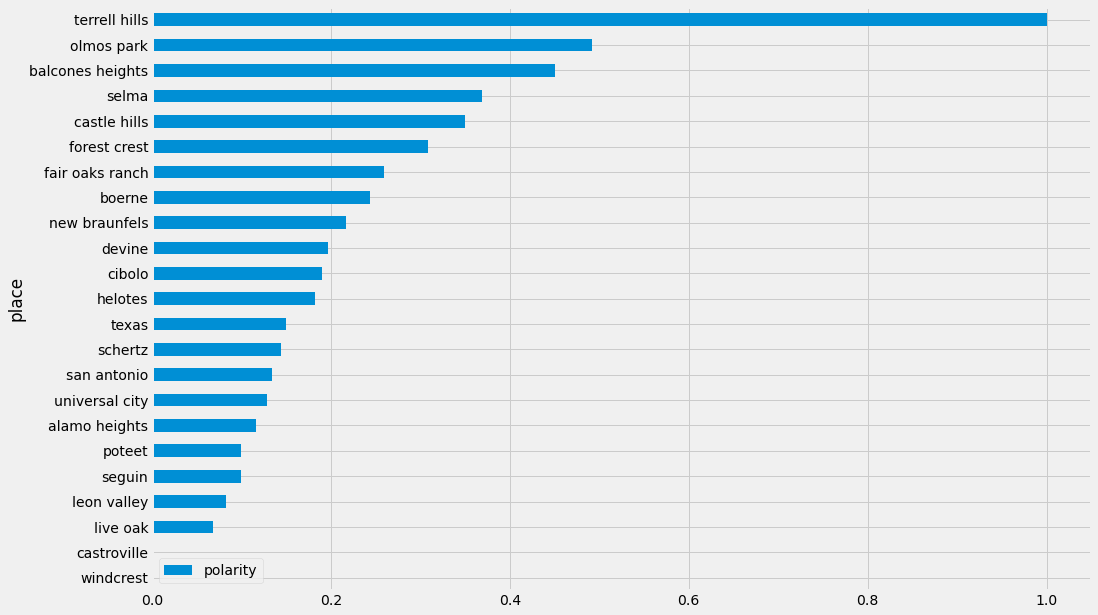

In [39]:
# Chart sentiments based on regions

#df_region_sentiment["polarity"] = pd.to_numeric(df_region_sentiment['polarity'])
df_region_sentiment.sort_values(by='polarity').plot.barh(x='place', y='polarity', rot=0, figsize=(15, 10))





In [40]:
df_time_sentiment.head(5)

,month,polarity
0,3,0.105229
1,4,0.127933
2,5,0.158779
3,6,0.106672
4,7,0.164687


<AxesSubplot:xlabel='month'>

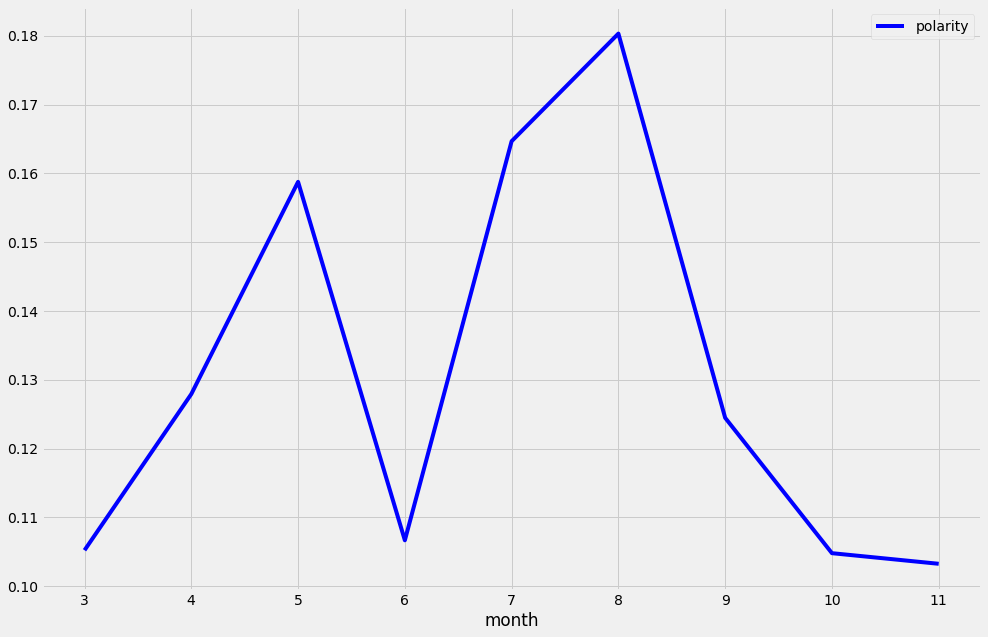

In [41]:
# Chart sentiments based on regions

df_time_sentiment.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(15, 10), color="blue")


## Extract Hashtags

In [42]:
df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,impromptu marketing session with chris cano ta...,thu apr 23 22:26:31 +0000 2020,san antonio,covid19 milspouse helpingveterans vahomeloan v...,0.200000,0.050000,positive,impromptu market session chri cano talk real ...,2020-04-23 22:26:31,4
1,corona virus shit is real shit is getting real...,fri mar 20 19:01:13 +0000 2020,san antonio,<na>,0.597222,-0.113889,negative,corona viru shit real shit get real everyth ...,2020-03-20 19:01:13,3
2,ill be hosting a telethon that streams live fr...,tue apr 21 16:24:08 +0000 2020,san antonio,<na>,0.825000,0.041288,positive,ill host telethon stream live thelonesomer...,2020-04-21 16:24:08,4
3,day of rona elementary level readinghomesch...,fri may 01 05:58:42 +0000 2020,san antonio,homeschool quarantine school kindergarten exte...,0.900000,0.300000,positive,day rona elementari level readinghomeschool q...,2020-05-01 05:58:42,5
4,corona virus shit is real sanantonio san anto...,sat apr 04 00:52:53 +0000 2020,san antonio,sanantonio,0.550000,0.000000,neutral,corona viru shit real sanantonio san antonio ...,2020-04-04 00:52:53,4
5,our is changing the old is falling so the ne...,sat may 02 18:17:59 +0000 2020,texas,<na>,0.288636,0.059091,positive,chang old fall new world begin colle...,2020-05-02 18:17:59,5
6,day of rona elementary zoom meetings got me ...,thu apr 30 01:31:51 +0000 2020,san antonio,homeschool quarantine school kindergarten exte...,0.900000,0.300000,positive,day rona elementari zoom meet got likehomesc...,2020-04-30 01:31:51,4
7,brighter days on the mind todays the first day...,thu apr 02 00:53:37 +0000 2020,san antonio,<na>,0.333333,0.250000,positive,brighter day mind today first day seve ask ...,2020-04-02 00:53:37,4
8,i caught the coronavirus again well at least t...,sat may 09 04:38:56 +0000 2020,san antonio,<na>,0.550000,0.250000,positive,caught coronaviru well least do xx cure...,2020-05-09 04:38:56,5
9,incase anyone is wondering what im actually ta...,thu apr 30 08:54:13 +0000 2020,san antonio,<na>,0.100000,0.000000,neutral,incas anyon wonder im actual talk actual ...,2020-04-30 08:54:13,4


In [43]:
## Extract Hashtags
positiveHashtags = []
negativeHashtags = []


for i in range(nRecords):
    if (df_text['analysis'][i]=='positive'):
        #positive sentiment  
        if ('<na>' in df_text['hashtags'][i]):      
            continue  
        else:
            splitList = str(df_text['hashtags'][i]).split(" ")            
            positiveHashtags = positiveHashtags + splitList
    elif (df_text['analysis'][i]=='negative'):
        #negative sentiment
        if ('<na>' in df_text['hashtags'][i]):  
            continue
        else:    
            splitList = str(df_text['hashtags'][i]).split(" ")    
            negativeHashtags = negativeHashtags + splitList       
    else:
        # neutral sentiment
        continue


# positive_hashtags = df_allHashtags['hashtags']




In [44]:
# type(negativeHashtags)
# print (negativeHashtags)

#Clear up the list from unwanted hashtags
commercialHashtags = ["streetphotographer", "urbanstreetphotography","urbanstreetphotogallery","photodocumentary"
,"spicollective","cityscape","urbansteetphotogallery","ig_street","bnw","bw","lensculture","bollywood","entertainment","urbanstreetphotogallery"]


for element in negativeHashtags:
    if element in commercialHashtags:
        negativeHashtags.remove(element)

for element in positiveHashtags:
    if element in commercialHashtags:
        positiveHashtags.remove(element)        

In [45]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(negativeHashtags)
df_NegativeHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_NegativeHashtags = df_NegativeHashtags.nlargest(columns='count', n=30)                    
df_NegativeHashtags.head(20) 

,Hashtag,count
9,covid19,7
8,socialdistancing,6
40,sanantonio,6
25,coronavirus,5
22,quarantine,4
63,aliencourtsports,4
4,stayhome,3
64,alien,3
3,corona,2
10,kingdonnie,2


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

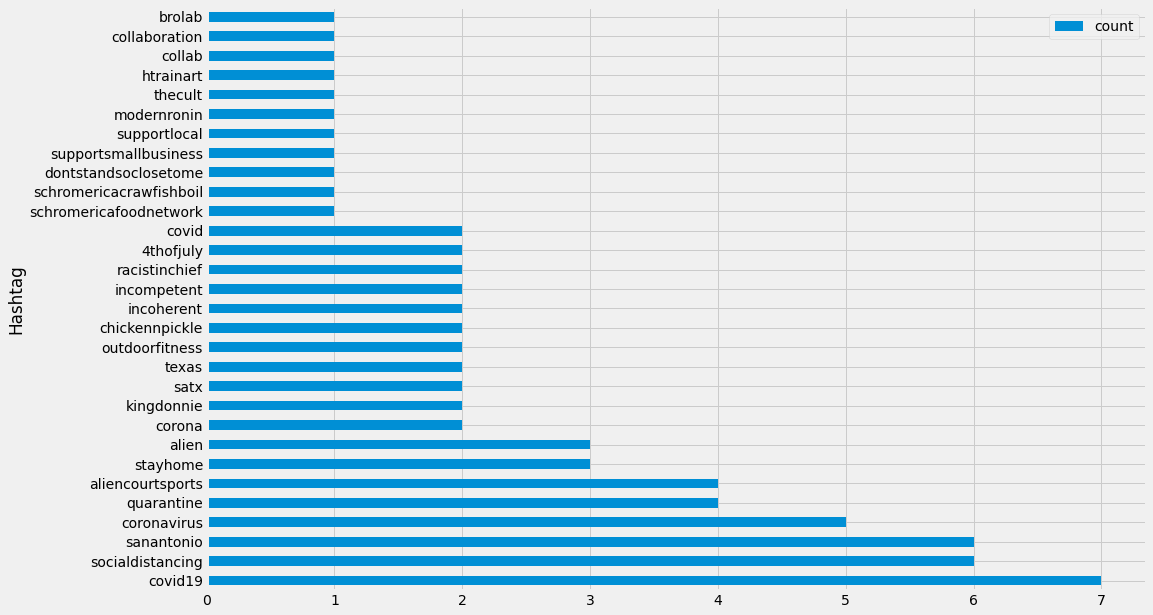

In [46]:
# display topc 20 negative tweets

plt.figure(figsize=(15,10))
df_NegativeHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))


In [47]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(positiveHashtags)
df_PositiveHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_PositiveHashtags = df_PositiveHashtags.nlargest(columns='count', n=30)       


df_PositiveHashtags.head(20) 

                 

,Hashtag,count
0,covid19,60
12,coronavirus,31
24,sanantonio,31
8,quarantine,24
172,socialdistancing,23
13,stayhome,18
17,satx,18
35,texas,17
7,homeschool,13
9,school,12


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

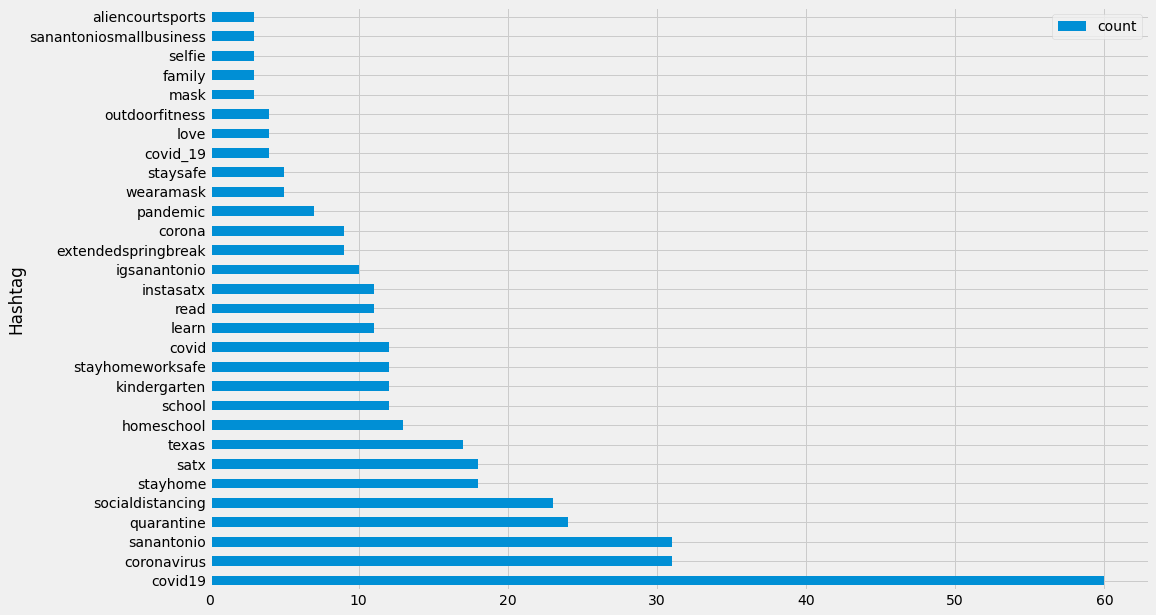

In [48]:
# display topc 20 positive tweets
plt.figure(figsize=(15,10))
df_PositiveHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))

In [49]:
# df_text['strTweets'] = df_text['text'].to_string()
# df_text.head()

In [50]:
# type(df_text['strTweets'])
# type(df_text['text'])

#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if "negative":
        return 0 
    elif 'positive':
        return 1
    else:
        return 0

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['label'] = df_text['analysis'].apply(getSentAnalysis)


In [51]:
df_text.head()

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,impromptu marketing session with chris cano ta...,thu apr 23 22:26:31 +0000 2020,san antonio,covid19 milspouse helpingveterans vahomeloan v...,0.200000,0.050000,positive,impromptu market session chri cano talk real ...,2020-04-23 22:26:31,4,0
1,corona virus shit is real shit is getting real...,fri mar 20 19:01:13 +0000 2020,san antonio,<na>,0.597222,-0.113889,negative,corona viru shit real shit get real everyth ...,2020-03-20 19:01:13,3,0
2,ill be hosting a telethon that streams live fr...,tue apr 21 16:24:08 +0000 2020,san antonio,<na>,0.825000,0.041288,positive,ill host telethon stream live thelonesomer...,2020-04-21 16:24:08,4,0
3,day of rona elementary level readinghomesch...,fri may 01 05:58:42 +0000 2020,san antonio,homeschool quarantine school kindergarten exte...,0.900000,0.300000,positive,day rona elementari level readinghomeschool q...,2020-05-01 05:58:42,5,0
4,corona virus shit is real sanantonio san anto...,sat apr 04 00:52:53 +0000 2020,san antonio,sanantonio,0.550000,0.000000,neutral,corona viru shit real sanantonio san antonio ...,2020-04-04 00:52:53,4,0
